In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 1. Recuperar una variable importante: Tenure (Antigüedad)
# Vamos a volver a cargar los datos para incluir 'tenure_days', pero dejamos fuera 'recency_days' (la trampa).
df = pd.read_parquet('../data/processed/churn_features.parquet')

features_to_drop = ['customer_unique_id', 'Estado del Cliente', 'churn', 'recency_days'] # Solo quitamos Recencia
X = df.drop(columns=features_to_drop, errors='ignore')
y = df['churn']

print(f"🌲 Features para el Bosque: {X.columns.tolist()}")

# 2. Dividir de nuevo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Entrenar Random Forest
# n_estimators=100: Crea 100 árboles
# max_depth=10: No dejes que los árboles crezcan infinito (evita memorizar)
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', max_depth=10, random_state=42)

print("🌲 Entrenando Random Forest (Esto puede tardar unos segundos)...")
rf_model.fit(X_train, y_train)

# 4. Evaluar
y_pred_rf = rf_model.predict(X_test)

print("\n📝 Reporte Random Forest:")
print(classification_report(y_test, y_pred_rf))

# 5. Matriz
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Matriz de Confusión - Random Forest')
plt.show()

🤖 Entrenando Regresión Logística...
📝 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.12      0.02      0.03      1890
           1       0.90      0.99      0.94     16782

    accuracy                           0.89     18672
   macro avg       0.51      0.50      0.49     18672
weighted avg       0.82      0.89      0.85     18672



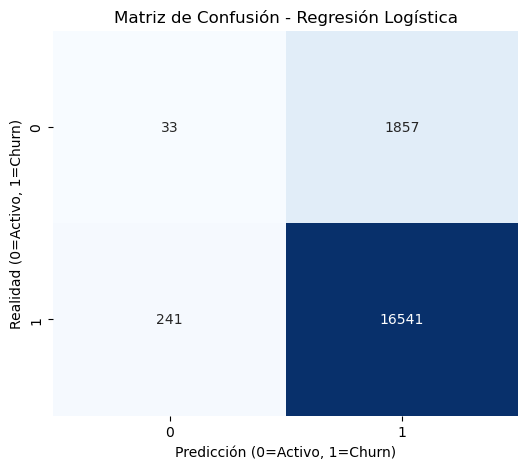

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 1. Inicializar el Modelo (El algoritmo clásico)
# class_weight='balanced' es CLAVE aquí porque tenemos muchos churners vs no churners.
# Le dice al modelo: "Presta más atención a la clase minoritaria".
log_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

print("🤖 Entrenando Regresión Logística...")
log_model.fit(X_train, y_train)

# 2. Hacer Predicciones (El examen)
y_pred = log_model.predict(X_test)

# 3. Evaluar Resultados
print("📝 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 4. Visualizar la Matriz de Confusión (¿Dónde fallamos?)
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción (0=Activo, 1=Churn)')
plt.ylabel('Realidad (0=Activo, 1=Churn)')
plt.show()

🔹 Features REALES (Solo Comportamiento): ['frequency', 'monetary_value', 'avg_days_between_orders']

📝 Reporte de Clasificación (HONESTO):
              precision    recall  f1-score   support

           0       0.12      0.02      0.03      1890
           1       0.90      0.99      0.94     16782

    accuracy                           0.89     18672
   macro avg       0.51      0.50      0.49     18672
weighted avg       0.82      0.89      0.85     18672



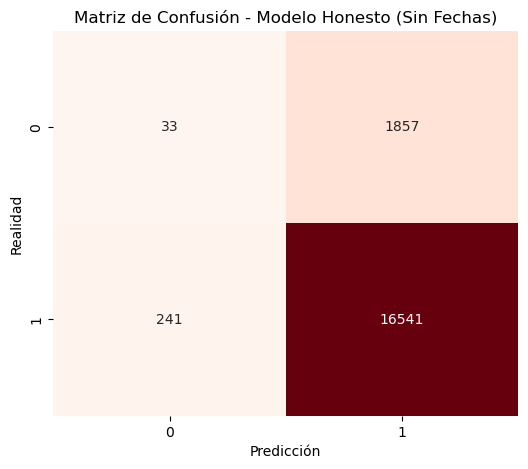

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Cargar Datos
df = pd.read_parquet('../data/processed/churn_features.parquet')

# 2. Selección de Variables (ELIMINANDO EL DATA LEAKAGE TOTAL)
# Quitamos 'recency_days' Y 'tenure_days'.
# Ahora el modelo solo puede ver: Frecuencia, Dinero y Promedio de días entre compras.
features_to_drop = ['customer_unique_id', 'Estado del Cliente', 'churn', 'recency_days', 'tenure_days']

X = df.drop(columns=features_to_drop, errors='ignore')
y = df['churn']

print(f"🔹 Features REALES (Solo Comportamiento): {X.columns.tolist()}")

# 3. División Train / Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Entrenar Modelo (Baseline Honesto)
log_model = LogisticRegression(class_weight='balanced', random_state=42)
log_model.fit(X_train, y_train)

# 5. Evaluar
y_pred = log_model.predict(X_test)

print("\n📝 Reporte de Clasificación (HONESTO):")
print(classification_report(y_test, y_pred))

# 6. Matriz de Confusión
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Matriz de Confusión - Modelo Honesto (Sin Fechas)')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()